# 그리드 서치
- 매개변수를 튜닝하여 일반화 성능을 개선하는 방법
- 관심있는 매개변수에 대해 가능한 모든 조합을 시도해보는 것

간단한 그리드 서치

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("train set size:{} test set size:{}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        #test set로 SVC 평가
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_params={'C':C, 'gamma':gamma}
            
print("best score:{:.2f}".format(best_score))
print("best param:",best_params)

train set size:112 test set size:38
best score:0.97
best param: {'C': 100, 'gamma': 0.001}


- 위와 같은 경우, 매개변수를 조정하기 위해 테스트세트를 이미 이용했기 때문에, 모델이 얼마나 좋은지 평가하는데는 더이상 사용할 수 없다.
- 평가를 위해서는 모델을 만들 때 사용하지 않은 독립적인 데이터셋이 필요하다.
- 따라서 데이터를 세 개의 세트로 나누고(훈련세트, 검증세트, 테스트세트), 훈련세트로 모델을 만들고, 검증세트로 매개변수를 선택한 뒤, 테스트 세트로 모델을 평가해야한다.

- 테스트 세트에 기초하여 어떤 선택을 한다는 것은 이미 테스트 세트 정보를 모델에 누설한 것.
- 따라서 아래와 같이 검증세트를 별도로 만들어서 이용하는 것을 권장

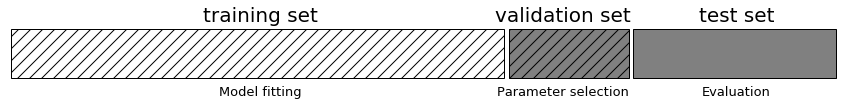

In [5]:
mglearn.plots.plot_threefold_split()

In [6]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("train set size:{} valid set size:{} test set size:{}".format(X_train.shape[0], X_valid.shape[0],X_test.shape[0]))

train set size:84 valid set size:28 test set size:38


In [8]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        #test set로 SVC 평가
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_params={'C':C, 'gamma':gamma}

#훈련세트와 검증세트를 합쳐서 다시 모델을 만든 후, 테스트 세트로 평가
svm = SVC(**best_params)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("best score in valid set:{:.2f}".format(best_score))
print("best score in best param:{:.2f}".format(test_score))
print("best param:",best_params)

best score in valid set:0.96
best score in best param:0.92
best param: {'C': 10, 'gamma': 0.001}


- 교차검증을 이용한 그리드 서치

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma, C=C)
        #test set로 SVC 평가
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_params={'C':C, 'gamma':gamma}
            
svm = SVC(**best_params)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

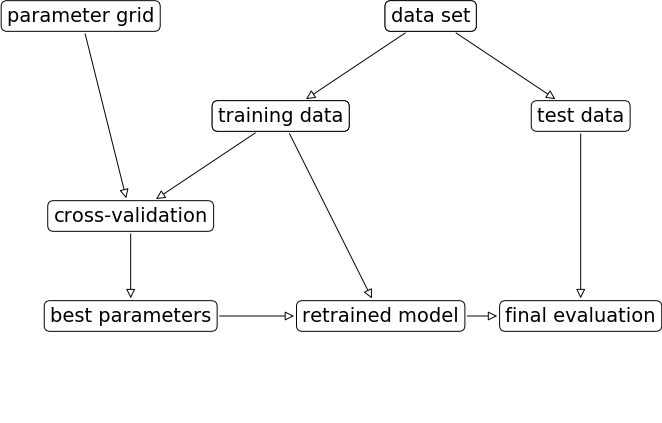

In [10]:
mglearn.plots.plot_grid_search_overview()

- 위와 같이 교차 검증을 사용한 그리드 서치는 매개변수 조정 방법으로 널리 사용되고 있으며,
- sklearn에서는 추정기 형태로 구현된 GridSearchCV를 제공한다.
- GridSearchCV는 딕셔너리 형태로 검색 대상 매개변수를 지정해주어야 한다.

In [11]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100]}
print("param grid:\n",param_grid)

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(),param_grid, cv=5, return_train_score=True)

param grid:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [12]:
#fit method 호출 시 param_grid에 설정된 매개변수 조합에 대한 교차검증 실시
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)
print("test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

test set score: 0.97


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
print("best param:",grid_search.best_params_)
print("best cross validation score:{:.2f}".format(grid_search.best_score_))

best param: {'C': 100, 'gamma': 0.01}
best cross validation score:0.97


best_score_에는 훈련세트에서 수행한 교차검증의 평균 정확도가 들어간다. 
score method는 전체 훈련 세트에서 학습한 모델에 대한 것

In [15]:
print("best score model:\n",grid_search.best_estimator_)

best score model:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
